In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use("dark_background")

import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', parse_dates=True)

df['total price'] = df['price'] + df['shipping']

df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')
df['weekday'] = df['time'].dt.day_name()
df['hour'] = df['time'].dt.hour + df['time'].dt.minute / 60

df

,time,price,shipping,bids,total price,weekday,hour
0,2025-04-26 19:46:00,33.50,1.80,10,35.30,Saturday,19.766667
1,2025-04-26 18:00:00,35.00,0.00,13,35.00,Saturday,18.000000
2,2025-04-26 15:17:00,36.00,0.00,22,36.00,Saturday,15.283333
3,2025-04-25 20:00:00,37.00,2.50,6,39.50,Friday,20.000000
4,2025-04-25 19:15:00,37.00,3.99,20,40.99,Friday,19.250000
5,2025-04-25 17:23:00,33.70,1.80,10,35.50,Friday,17.383333
6,2025-04-24 19:43:00,33.70,1.80,10,35.50,Thursday,19.716667
7,2025-04-24 11:13:00,32.38,4.00,9,36.38,Thursday,11.216667
8,2025-04-23 18:05:00,33.70,1.80,10,35.50,Wednesday,18.083333
9,2025-04-21 21:32:00,30.50,1.80,2,32.30,Monday,21.533333


In [11]:
print('average price:', round(df['total price'].mean() , 2))
print('median  price:', round(df['total price'].median() , 2))

time_range = df['time'].max() - df['time'].min()

offers_per_day = df.shape[0] / (time_range.total_seconds() / 3600 / 24)
print(f"{round(offers_per_day , 1)} offers per day")

average price: 36.31
median  price: 35.5
2.3 offers per day


Text(0.5, 1.0, 'Price distribution')

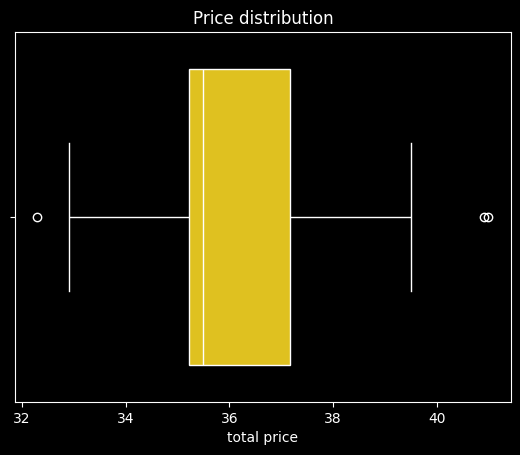

In [4]:
sns.boxplot(x='total price', data=df, color='gold', linecolor='white')
plt.title('Price distribution')

# plt.savefig('price_distribution.png', dpi=300, transparent = True)

Text(0.5, 1.0, 'Price distribution depending on offer')

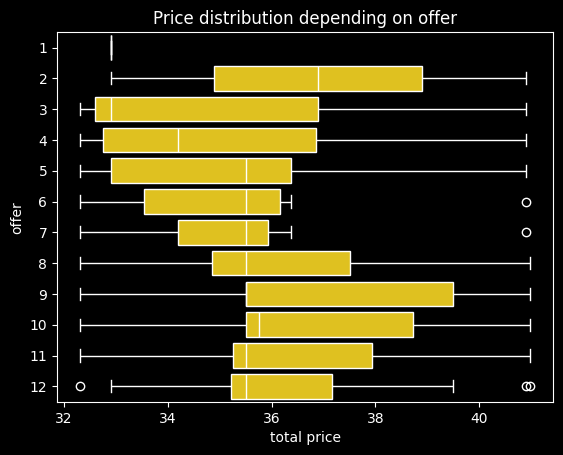

In [5]:
df_history = df.copy()
df_history['offer'] = df.shape[0]

for n in range(df.shape[0] - 1):
    df_history_new = df.copy()
    df_history_new = df_history_new.iloc[n+1:]
    df_history_new['offer'] = df.shape[0] - 1 - n
    df_history = pd.concat([df_history, df_history_new]).reset_index(drop=True)

sns.boxplot(x='total price', y='offer', data=df_history, color='gold', linecolor='white', orient='h')
plt.title('Price distribution depending on offer')

# plt.savefig('price_history.png', dpi=300, transparent = True)

Text(0.5, 1.0, 'Price over time')

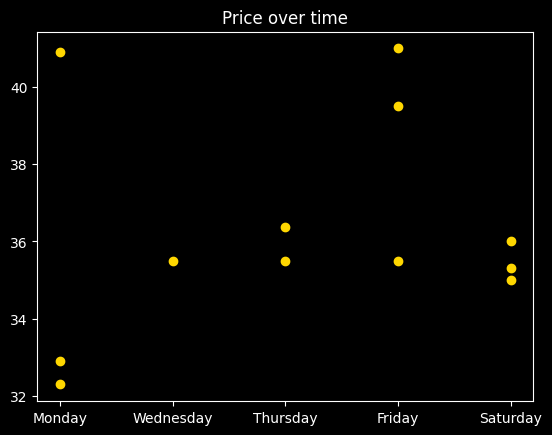

In [6]:
plt.plot(df['weekday'], df['total price'], 'o', color = 'gold')
plt.gca().invert_xaxis()
plt.title('Price over time')

# plt.savefig('price_time.png', dpi=300, transparent = True)

Text(0.5, 1.0, 'Price depending on weekday')

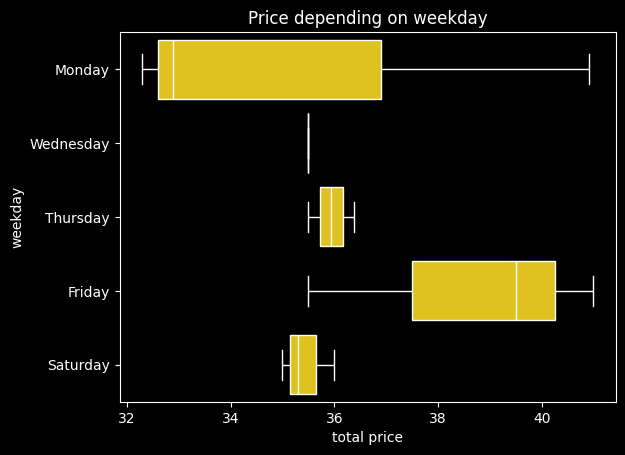

In [7]:
sns.boxplot(x='total price', y='weekday', data=df, color='gold', linecolor='white', )
plt.gca().invert_yaxis()
plt.title('Price depending on weekday')

# plt.savefig('price_weekday.png', dpi=300, transparent = True)

Text(0.5, 1.0, 'Price depending on number of bids')

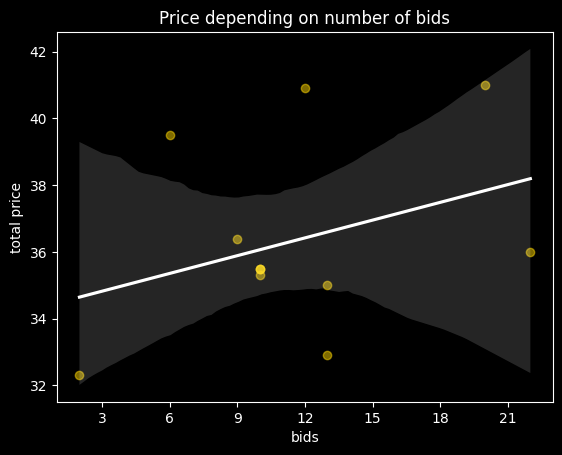

In [8]:
sns.regplot(y='total price', x='bids', data=df, scatter_kws={'color': 'gold', 'alpha': 0.5}, line_kws={'color': 'white'})
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Price depending on number of bids')

# plt.savefig('price_bids.png', dpi=300, transparent = True)

(31.0, 43.0)

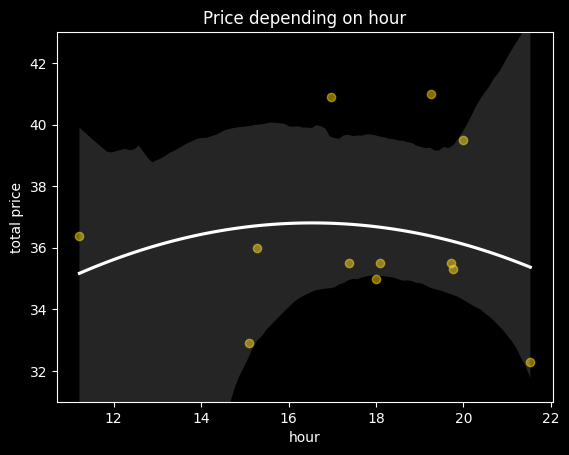

In [9]:
sns.regplot(x='hour', y='total price', data=df, order=2, scatter_kws={'color': 'gold', 'alpha': 0.5}, line_kws={'color': 'white'})
plt.title('Price depending on hour')
plt.ylim(31, 43)

# plt.savefig('price_hour.png', dpi=300, transparent = True)

Text(0.5, 1.0, 'Bids depending on hour')

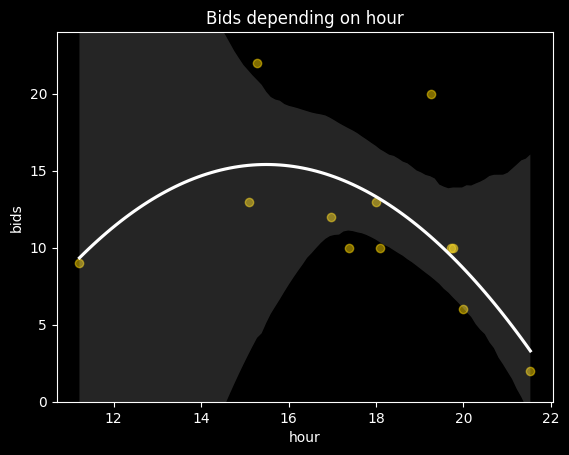

In [10]:
sns.regplot(x='hour', y='bids', data=df, order=2, scatter_kws={'color': 'gold', 'alpha': 0.5}, line_kws={'color': 'white'})
plt.ylim(0, 24)
plt.title('Bids depending on hour')

# plt.savefig('bids_hour.png', dpi=300, transparent = True)